# MLL CLASSIFICATION USING GENE EXPRESSION DATA

In [1]:
import pandas as pd
data = pd.read_csv('MLL.csv')

In [2]:
data.head()

Type  31307  31308_at  31309_r_at  31310_at  31311_at  31312_at  31313_at  \
0  ALL -135.7    -100.1       -94.6      -230       0.6     -50.4     -36.3   
1  ALL  -80.0     -23.0        -6.0      -145     491.0     290.0    -235.0   
2  ALL  -91.0    -130.0       -27.0       -51     236.0    -163.0    -304.0   
3  ALL -144.0    -124.0       -26.0      -139     -88.0      34.0    -411.0   
4  ALL  -89.0     -25.0       -64.0      -112     452.0     183.0     107.0   

   31314_at  31315_at  ...  100_g_at  101_at  102_at  103_at  104_at  105_at  \
0     139.5      31.6  ...     548.7  -225.2   242.5   101.7   473.1   -59.9   
1      41.0    4602.0  ...    1464.0  -175.0   143.0    96.0   301.0   -50.0   
2     -35.0     498.0  ...     339.0  -308.0   184.0   -32.0   350.0   -11.0   
3     118.0    -239.0  ...     798.0   731.0   106.0  -330.0   -36.0  -190.0   
4     233.0      38.0  ...     730.0   182.0   426.0   155.0   607.0    50.0   

   106_at  107_at  108_g_at  109_at  
0   217.9   275.6    -461.6  1115.5  
1   242.0   222.0    -330.0  2481.0  
2   837.0   174.0     -99.0   376.0  
3   999.0   255.0    -353.0  1603.0  
4   249.0  1635.0    -780.0  1103.0  

[5 rows x 12534 columns]

In [3]:
print(data.values)

[['ALL' -135.7 -100.1 ... 275.6 -461.6 1115.5]
 ['ALL' -80.0 -23.0 ... 222.0 -330.0 2481.0]
 ['ALL' -91.0 -130.0 ... 174.0 -99.0 376.0]
 ...
 ['AML' -230.0 -66.0 ... 829.0 -2015.0 385.0]
 ['AML' -359.0 -52.0 ... -87.0 -2038.0 1228.0]
 ['AML' -251.0 -225.0 ... -313.0 -1770.0 791.0]]


In [4]:
data.head()

Type  31307  31308_at  31309_r_at  31310_at  31311_at  31312_at  31313_at  \
0  ALL -135.7    -100.1       -94.6      -230       0.6     -50.4     -36.3   
1  ALL  -80.0     -23.0        -6.0      -145     491.0     290.0    -235.0   
2  ALL  -91.0    -130.0       -27.0       -51     236.0    -163.0    -304.0   
3  ALL -144.0    -124.0       -26.0      -139     -88.0      34.0    -411.0   
4  ALL  -89.0     -25.0       -64.0      -112     452.0     183.0     107.0   

   31314_at  31315_at  ...  100_g_at  101_at  102_at  103_at  104_at  105_at  \
0     139.5      31.6  ...     548.7  -225.2   242.5   101.7   473.1   -59.9   
1      41.0    4602.0  ...    1464.0  -175.0   143.0    96.0   301.0   -50.0   
2     -35.0     498.0  ...     339.0  -308.0   184.0   -32.0   350.0   -11.0   
3     118.0    -239.0  ...     798.0   731.0   106.0  -330.0   -36.0  -190.0   
4     233.0      38.0  ...     730.0   182.0   426.0   155.0   607.0    50.0   

   106_at  107_at  108_g_at  109_at  
0   217.9   275.6    -461.6  1115.5  
1   242.0   222.0    -330.0  2481.0  
2   837.0   174.0     -99.0   376.0  
3   999.0   255.0    -353.0  1603.0  
4   249.0  1635.0    -780.0  1103.0  

[5 rows x 12534 columns]

## Checking to see if there is any missing values or not

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Columns: 12534 entries, Type to 109_at
dtypes: float64(11224), int64(1309), object(1)
memory usage: 6.9+ MB


In [6]:
data.describe()

31307    31308_at  31309_r_at    31310_at     31311_at  \
count   72.000000   72.000000   72.000000   72.000000    72.000000   
mean  -188.495833  -94.098611  -31.716667  -37.708333   376.938889   
std     97.886654  149.780756   45.519842  167.468596   274.066937   
min   -398.000000 -875.000000 -149.000000 -545.000000  -173.000000   
25%   -251.000000 -152.000000  -64.000000 -130.500000   178.500000   
50%   -167.000000  -65.000000  -30.000000  -74.500000   340.500000   
75%   -115.750000  -19.500000   -8.250000   79.000000   537.750000   
max     75.000000  132.000000   92.000000  377.000000  1059.000000   

         31312_at     31313_at    31314_at     31315_at    31316_at  ...  \
count   72.000000    72.000000   72.000000    72.000000   72.000000  ...   
mean    -7.130556  -397.726389   27.729167   538.091667  -67.266667  ...   
std    190.598033   323.552802  196.632494  1230.456868   53.191909  ...   
min   -710.000000 -1446.000000 -640.000000  -572.000000 -320.000000  ...   
25%    -75.500000  -584.000000  -78.750000  -106.250000  -94.500000  ...   
50%     34.000000  -367.000000   51.500000    34.800000  -64.500000  ...   
75%    127.250000  -167.000000  164.750000   655.500000  -32.800000  ...   
max    290.000000   151.000000  502.000000  5787.000000   38.000000  ...   

          100_g_at       101_at      102_at       103_at       104_at  \
count    72.000000    72.000000   72.000000    72.000000    72.000000   
mean   1558.551389   -57.780556  183.590278   126.329167   500.098611   
std     857.851818   388.090112  132.052602   231.256722   240.975392   
min     339.000000  -935.000000  -37.000000  -330.000000   -36.000000   
25%     855.500000  -340.500000   93.000000    21.250000   350.750000   
50%    1321.000000  -118.500000  142.500000    86.000000   454.000000   
75%    2174.000000   176.000000  241.375000   215.500000   628.000000   
max    4998.000000  1010.000000  528.000000  1212.000000  1101.000000   

           105_at       106_at       107_at     108_g_at       109_at  
count   72.000000    72.000000    72.000000    72.000000    72.000000  
mean     4.515278  1057.665278   366.438889  -993.938889  1119.937500  
std    120.956464  1311.734783   538.404428   692.766342   608.321056  
min   -313.000000    -6.000000  -598.000000 -3352.000000  -395.000000  
25%    -64.500000   284.750000     9.750000 -1354.250000   735.000000  
50%      4.500000   548.000000   243.500000  -904.000000  1028.500000  
75%     79.250000  1356.000000   663.000000  -457.700000  1543.500000  
max    251.000000  7567.000000  2512.000000   -18.000000  2926.000000  

[8 rows x 12533 columns]

## Replacing categorical values with numaric value 

In [7]:
data['Type'] = data['Type'].replace(['ALL', 'MLL', 'AML'],[0, 1, 2])

In [8]:
data.head()

Type  31307  31308_at  31309_r_at  31310_at  31311_at  31312_at  31313_at  \
0     0 -135.7    -100.1       -94.6      -230       0.6     -50.4     -36.3   
1     0  -80.0     -23.0        -6.0      -145     491.0     290.0    -235.0   
2     0  -91.0    -130.0       -27.0       -51     236.0    -163.0    -304.0   
3     0 -144.0    -124.0       -26.0      -139     -88.0      34.0    -411.0   
4     0  -89.0     -25.0       -64.0      -112     452.0     183.0     107.0   

   31314_at  31315_at  ...  100_g_at  101_at  102_at  103_at  104_at  105_at  \
0     139.5      31.6  ...     548.7  -225.2   242.5   101.7   473.1   -59.9   
1      41.0    4602.0  ...    1464.0  -175.0   143.0    96.0   301.0   -50.0   
2     -35.0     498.0  ...     339.0  -308.0   184.0   -32.0   350.0   -11.0   
3     118.0    -239.0  ...     798.0   731.0   106.0  -330.0   -36.0  -190.0   
4     233.0      38.0  ...     730.0   182.0   426.0   155.0   607.0    50.0   

   106_at  107_at  108_g_at  109_at  
0   217.9   275.6    -461.6  1115.5  
1   242.0   222.0    -330.0  2481.0  
2   837.0   174.0     -99.0   376.0  
3   999.0   255.0    -353.0  1603.0  
4   249.0  1635.0    -780.0  1103.0  

[5 rows x 12534 columns]

In [9]:
data.tail()

Type  31307  31308_at  31309_r_at  31310_at  31311_at  31312_at  31313_at  \
67     2 -324.0    -168.0       -49.0       312    1059.0     -24.0    -404.0   
68     2 -148.0    -104.0        29.0        72     465.0     162.0    -895.0   
69     2 -230.0     -66.0       -69.0       377     686.0     -44.0    -123.0   
70     2 -359.0     -52.0      -147.0       120     564.0     -52.0    -584.0   
71     2 -251.0    -225.0       -64.0       129     540.0     181.0    -781.0   

    31314_at  31315_at  ...  100_g_at  101_at  102_at  103_at  104_at  105_at  \
67      12.0     101.0  ...    1808.0  -422.0   528.0   220.0   643.0   187.0   
68      33.0    1736.0  ...    2913.0   128.0    94.0    66.0   556.0    63.0   
69       7.0     310.0  ...    2555.0  -230.0   257.0    71.0   581.0    64.0   
70      64.0    2528.0  ...    1982.0  -236.0    88.0    94.0   143.0   232.0   
71    -441.0     150.0  ...    2495.0  -625.0   139.0     7.0   718.0   230.0   

    106_at  107_at  108_g_at  109_at  
67   407.0  -564.0   -1736.0   346.0  
68   200.0   120.0    -757.0   825.0  
69    35.0   829.0   -2015.0   385.0  
70   434.0   -87.0   -2038.0  1228.0  
71   743.0  -313.0   -1770.0   791.0  

[5 rows x 12534 columns]

# Feature Extraction using Pearson's Correlation

In [10]:
data_new = data.drop(columns = "Type", axis = 1, inplace = False)

data_new.head()

31307  31308_at  31309_r_at  31310_at  31311_at  31312_at  31313_at  \
0 -135.7    -100.1       -94.6      -230       0.6     -50.4     -36.3   
1  -80.0     -23.0        -6.0      -145     491.0     290.0    -235.0   
2  -91.0    -130.0       -27.0       -51     236.0    -163.0    -304.0   
3 -144.0    -124.0       -26.0      -139     -88.0      34.0    -411.0   
4  -89.0     -25.0       -64.0      -112     452.0     183.0     107.0   

   31314_at  31315_at  31316_at  ...  100_g_at  101_at  102_at  103_at  \
0     139.5      31.6     -32.2  ...     548.7  -225.2   242.5   101.7   
1      41.0    4602.0     -37.0  ...    1464.0  -175.0   143.0    96.0   
2     -35.0     498.0     -56.0  ...     339.0  -308.0   184.0   -32.0   
3     118.0    -239.0    -104.0  ...     798.0   731.0   106.0  -330.0   
4     233.0      38.0     -35.0  ...     730.0   182.0   426.0   155.0   

   104_at  105_at  106_at  107_at  108_g_at  109_at  
0   473.1   -59.9   217.9   275.6    -461.6  1115.5  
1   301.0   -50.0   242.0   222.0    -330.0  2481.0  
2   350.0   -11.0   837.0   174.0     -99.0   376.0  
3   -36.0  -190.0   999.0   255.0    -353.0  1603.0  
4   607.0    50.0   249.0  1635.0    -780.0  1103.0  

[5 rows x 12533 columns]

In [11]:
corr_matrix = data.corr()
corr = corr_matrix['Type'].sort_values(ascending=False)[:21]
corr = corr * 100
corr

Type          100.000000
39598_at       76.757690
35083_at       74.939609
36678_at       73.856327
239_at         72.593397
37403_at       71.325959
40295_at       69.977915
39448_r_at     69.563292
37765_at       69.476177
121_at         69.358451
40686_at       69.318542
2035_s_at      69.291861
678_at         69.081494
41078_at       68.934101
2013_at        68.645062
277_at         68.607825
39680_at       68.517572
1991_s_at      68.415807
33657_at       68.121118
33728_at       67.858425
35027_at       67.802495
Name: Type, dtype: float64

<AxesSubplot:>

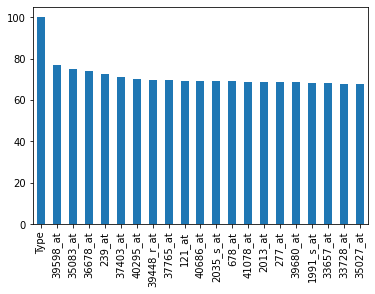

In [12]:
corr.plot(kind = 'bar')

In [13]:
# feature selection as mentioned in the research paper 

#list_gene = list(corr.index)

# research paper

list_gene = ["Type","1389_at", "34306_at","36162_at","963_at","39598_at","40797_at","39448_r_at","1894_f_at","39931_at",
             "32847_at","36239_at","39556_at","34168_at","40570_at","39385_at","266_s_at","39011_at","1065_at",
             "39318_at", "32872_at"]

data_new = data[list_gene]

data_new.head()

Type  1389_at  34306_at  36162_at  963_at  39598_at  40797_at  39448_r_at  \
0     0  15467.9    2338.3     951.2    1790    1118.1    1100.4        1093   
1     0  14835.0    6712.0    1355.0    1741    1593.0    1920.0         764   
2     0   4416.0    1259.0     467.0     422    1132.0     565.0        1098   
3     0  16349.0    4510.0     991.0     298     425.0    1984.0         381   
4     0  20824.0    4826.0    4727.0    1660    1958.0    1244.0        1102   

   1894_f_at  39931_at  ...  36239_at  39556_at  34168_at  40570_at  39385_at  \
0     1055.7      1581  ...   10358.4    4027.3   11917.7    4950.5      84.8   
1     1611.0      1143  ...   10999.0    3236.0   11523.0    8112.0     105.0   
2      727.0      1311  ...    2006.0    1726.0    2374.0   13982.0      -6.0   
3     1036.0      2647  ...    3542.0    2477.0   13125.0    7702.0    -155.0   
4     1737.0      1435  ...    2363.0    2194.0    9363.0    6703.0     347.0   

   266_s_at  39011_at  1065_at  39318_at  32872_at  
0   14650.4    1350.9   1508.5   15880.4    1682.7  
1   13881.0    2988.0    862.0   20335.0    4313.0  
2    5536.0    1212.0    877.0    2423.0    4257.0  
3   13408.0    1118.0  18149.0   20775.0    3075.0  
4    5817.0    2211.0  10336.0   22301.0    1634.0  

[5 rows x 21 columns]

In [14]:
data_new.shape

(72, 21)

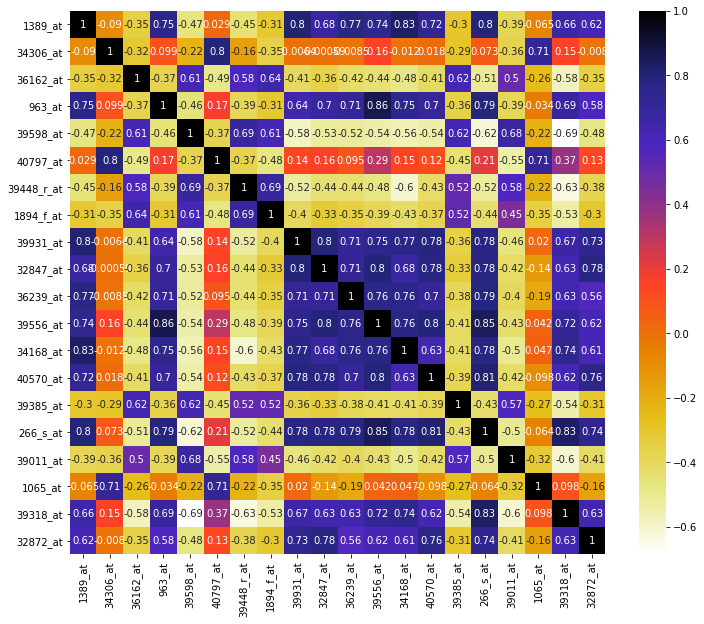

In [15]:
# Correlation plotting of the 20 highest attributes using Pearson Correlation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))
cor = data_new.drop("Type", axis = 1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# CASE 1: Using 50% of the dataset as training set and 50% of the dataset as test set.

# 1.0.Train-Test Split (50:50)

In [16]:
from sklearn.model_selection import train_test_split
train_set_1, test_set_1 = train_test_split(data_new, train_size = 0.51, random_state = 42)

In [17]:
print(f"Rows in train set: {len(train_set_1)}\nRows in test set: {len(test_set_1)}")

Rows in train set: 36
Rows in test set: 36


In [18]:
train_set_1.head()

Type  1389_at  34306_at  36162_at  963_at  39598_at  40797_at  39448_r_at  \
64     2   1170.0    2183.0    7567.0      27    3357.0    1829.0        1782   
3      0  16349.0    4510.0     991.0     298     425.0    1984.0         381   
17     0  14431.0    2727.0    1676.0     460     698.0     949.0         954   
38     1      2.0    8144.0    4175.0     200    3311.0    2612.0        1553   
8      0   7822.0    4208.0     842.0    1113     449.0    2627.0         577   

    1894_f_at  39931_at  ...  36239_at  39556_at  34168_at  40570_at  \
64      979.0        -3  ...      53.0     164.0     -43.0     574.0   
3      1036.0      2647  ...    3542.0    2477.0   13125.0    7702.0   
17     1215.0       281  ...    5150.0    2177.0    9129.0    1370.0   
38     1491.0       570  ...     299.0    1160.0     -68.0    1601.0   
8      1797.0      1825  ...    2208.0    2888.0   10111.0    9333.0   

    39385_at  266_s_at  39011_at  1065_at  39318_at  32872_at  
64    1027.0     -45.0    1695.0   3739.0     536.0     154.0  
3     -155.0   13408.0    1118.0  18149.0   20775.0    3075.0  
17      22.0   15278.0     626.0   1060.0   20451.0     552.0  
38      30.0    4466.0    3507.0  13681.0    4758.0     224.0  
8       23.0   18762.0     197.0    988.0   29683.0   11396.0  

[5 rows x 21 columns]

In [19]:
test_set_1.head()

Type  1389_at  34306_at  36162_at  963_at  39598_at  40797_at  39448_r_at  \
4      0  20824.0    4826.0    4727.0    1660    1958.0    1244.0        1102   
62     2    496.0    4338.0    7578.0     257    5155.0     628.0        2693   
18     0  14306.0    5099.0    3331.0     473    1698.0    2083.0         839   
0      0  15467.9    2338.3     951.2    1790    1118.1    1100.4        1093   
28     1    773.0   11210.0    1572.0     169     731.0    1619.0        1003   

    1894_f_at  39931_at  ...  36239_at  39556_at  34168_at  40570_at  \
4      1737.0      1435  ...    2363.0    2194.0    9363.0    6703.0   
62     4557.0       191  ...      45.0     510.0    -152.0     509.0   
18      876.0      1715  ...    2125.0    1338.0    6284.0    7873.0   
0      1055.7      1581  ...   10358.4    4027.3   11917.7    4950.5   
28      -27.0       537  ...     520.0     599.0     108.0    3186.0   

    39385_at  266_s_at  39011_at  1065_at  39318_at  32872_at  
4      347.0    5817.0    2211.0  10336.0   22301.0    1634.0  
62    1218.0     178.0    5693.0   5897.0     501.0     335.0  
18     232.0   11211.0    1404.0   9294.0   22281.0    6677.0  
0       84.8   14650.4    1350.9   1508.5   15880.4    1682.7  
28      69.0    2528.0    1276.0  10863.0     655.0    -214.0  

[5 rows x 21 columns]

In [20]:
X_train_1 = train_set_1.drop("Type", axis = 1)
y_train_1 = train_set_1["Type"]
X_test_1 = test_set_1.drop("Type", axis = 1)
y_test_1 = test_set_1["Type"]

# 1.1.Confusion Matrix Heatmap of perfect predictions

In [21]:
label = ['ALL', 'MLL', 'AML']

[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'MLL'), Text(0, 2.5, 'AML')]

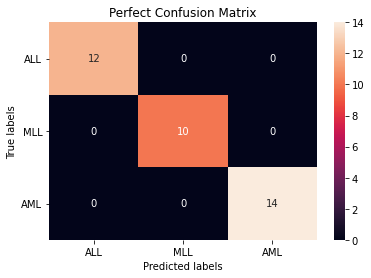

In [22]:
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_1, y_test_1), ax = ax, annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Perfect Confusion Matrix') 
ax.xaxis.set_ticklabels(label) 
ax.yaxis.set_ticklabels(label, rotation=360)

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# 1.2.Using Logistic Regression model

In [24]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression(solver='lbfgs', max_iter=400)
model_1.fit(X_train_1, y_train_1)

LogisticRegression(max_iter=400)

In [25]:
lr_score_1 = model_1.score(X_train_1, y_train_1)

In [26]:
lr_score_1

1.0

In [27]:
print(f"Score: {round((lr_score_1*100), 2)}%")

Score: 100.0%


In [28]:
y_test_pred_1 = model_1.predict(X_test_1)

y_test_pred_1

array([0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 1, 1, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0], dtype=int64)

## 1.2.1.Accuracy, Precision_score, Recall_score, F1_score of the Logistic Regressor

In [29]:
print(f"Accuracy: {round((accuracy_score(y_test_1, y_test_pred_1)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_1, y_test_pred_1, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_1, y_test_pred_1, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_1, y_test_pred_1, labels=[0,1,2], average='weighted')*100), 2)}%")

Accuracy: 97.22%
Precision: 97.47%
Recall: 97.22%
F1_score: 97.23%


## 1.2.2.Classification Report of the Logistic Regressor

In [30]:
print(classification_report(y_test_1, y_test_pred_1))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        14

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



## 1.2.3.Confusion Matrix Heatmap of the Logistic Regressor

In [31]:
cm = confusion_matrix(y_test_1, y_test_pred_1)
cm

array([[11,  1,  0],
       [ 0, 10,  0],
       [ 0,  0, 14]], dtype=int64)

[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'MLL'), Text(0, 2.5, 'AML')]

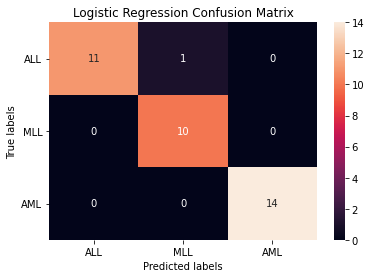

In [32]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_1, y_test_pred_1), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression Confusion Matrix') 
ax.xaxis.set_ticklabels(label) 
ax.yaxis.set_ticklabels(label, rotation=360)

# 1.3.Using SVM model

In [33]:
from sklearn.svm import SVC
svm_clf_1 = SVC()
svm_clf_1.fit(X_train_1, y_train_1)

SVC()

In [34]:
svm_score_1 = svm_clf_1.score(X_train_1, y_train_1)

In [35]:
print(f"Score: {round((svm_score_1*100), 2)}%")

Score: 100.0%


In [36]:
y_test_pred_11 = svm_clf_1.predict(X_test_1)
y_test_pred_11

array([0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 1, 1, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 1, 0], dtype=int64)

## 1.3.1.Accuracy, Precision_score, Recall_score, F1_score of the SVM model

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
print(f"Accuracy: {round((accuracy_score(y_test_1, y_test_pred_11)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_1, y_test_pred_11,labels=[0,1,2], average='micro')*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_1, y_test_pred_11,labels=[0,1,2], average='micro')*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_1, y_test_pred_11,labels=[0,1,2], average='micro')*100), 2)}%")

Accuracy: 94.44%
Precision: 94.44%
Recall: 94.44%
F1_score: 94.44%


## 1.3.2.Classification Report of the SVM model

In [39]:
print(classification_report(y_test_1, y_test_pred_11))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.90      0.90      0.90        10
           2       0.93      1.00      0.97        14

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



## 1.3.3.Confusion Matrix Heatmap of the SVM model

In [40]:
confusion_matrix(y_test_1, y_test_pred_11)

array([[11,  1,  0],
       [ 0,  9,  1],
       [ 0,  0, 14]], dtype=int64)

[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'MLL'), Text(0, 2.5, 'AML')]

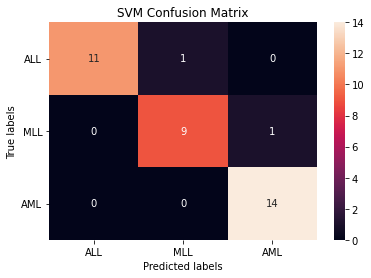

In [41]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_1, y_test_pred_11), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVM Confusion Matrix') 
ax.xaxis.set_ticklabels(label) 
ax.yaxis.set_ticklabels(label, rotation=360)

# 1.4.Using Naive Bayes model

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb_1 = GaussianNB()
gnb_1.fit(X_train_1, y_train_1)

GaussianNB()

In [43]:
gnb_score_1 = gnb_1.score(X_train_1, y_train_1)

In [44]:
print(f"Score: {round((gnb_score_1*100), 2)}%")

Score: 100.0%


In [45]:
y_test_pred_12 = gnb_1.predict(X_test_1)

In [46]:
y_test_pred_12

array([0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0,
       1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0], dtype=int64)

## 1.4.1.Accuracy, Precision_score, Recall_score, F1_score of the Naive Bayes model

In [47]:
print(f"Accuracy: {round((accuracy_score(y_test_1, y_test_pred_12)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_1, y_test_pred_12, labels=[0,1,2], average='micro')*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_1, y_test_pred_12, labels=[0,1,2], average='micro')*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_1, y_test_pred_12, labels=[0,1,2], average='micro')*100), 2)}%")

Accuracy: 86.11%
Precision: 86.11%
Recall: 86.11%
F1_score: 86.11%


## 1.4.2.Classification Report of the Naive Bayes model

In [48]:
print(classification_report(y_test_1, y_test_pred_12))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       0.80      0.80      0.80        10
           2       0.92      0.79      0.85        14

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



## 1.4.3.Confusion Matrix Heatmap of the Naive Bayes model

In [49]:
confusion_matrix(y_test_1, y_test_pred_12)

array([[12,  0,  0],
       [ 1,  8,  1],
       [ 1,  2, 11]], dtype=int64)

[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'MLL'), Text(0, 2.5, 'AML')]

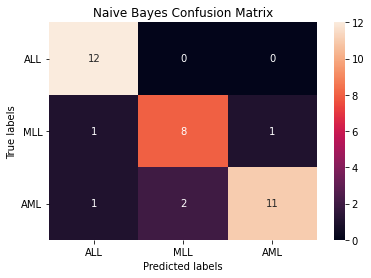

In [50]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_1, y_test_pred_12), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Naive Bayes Confusion Matrix') 
ax.xaxis.set_ticklabels(label) 
ax.yaxis.set_ticklabels(label, rotation=360)

# 1.5.Using XGBoost model

In [51]:
from xgboost import XGBClassifier
xgb_clf_1 = XGBClassifier(use_label_encoder = False, gamma=1, eval_metric='mlogloss', max_depth = 3, learning_rate=0.1)
xgb_clf_1.fit(X_train_1, y_train_1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [52]:
xgb_score_1 = xgb_clf_1.score(X_train_1, y_train_1)

In [53]:
print(f"Score: {round((xgb_score_1*100), 2)}%")

Score: 100.0%


In [54]:
y_test_pred_13 = xgb_clf_1.predict(X_test_1)

In [55]:
y_test_pred_13

array([0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0], dtype=int64)

## 1.5.1.Accuracy, Precision_score, Recall_score, F1_score of the XGBoost model

In [56]:
print(f"Accuracy: {round((accuracy_score(y_test_1, y_test_pred_13)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_1, y_test_pred_13, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_1, y_test_pred_13, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_1, y_test_pred_13, labels=[0,1,2], average='weighted')*100), 2)}%")

Accuracy: 88.89%
Precision: 89.24%
Recall: 88.89%
F1_score: 88.64%


## 1.5.2.Classification Report of the XGBoost model

In [57]:
print(classification_report(y_test_1, y_test_pred_13))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.70      0.78        10
           2       0.81      0.93      0.87        14

    accuracy                           0.89        36
   macro avg       0.90      0.88      0.88        36
weighted avg       0.89      0.89      0.89        36



## 1.5.3.Confusion Matrix Heatmap of the XGBoost model

In [58]:
confusion_matrix(y_test_1, y_test_pred_13)

array([[12,  0,  0],
       [ 0,  7,  3],
       [ 0,  1, 13]], dtype=int64)

[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'MLL'), Text(0, 2.5, 'AML')]

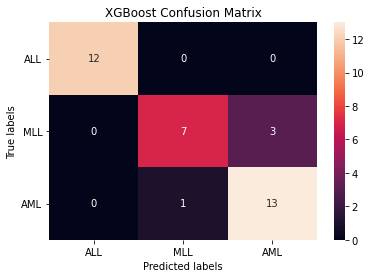

In [59]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_1, y_test_pred_13), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('XGBoost Confusion Matrix') 
ax.xaxis.set_ticklabels(label) 
ax.yaxis.set_ticklabels(label, rotation=360)

# 1.6.Using Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf_1 = RandomForestClassifier(max_depth = 3, random_state = 0)
rfc_clf_1.fit(X_train_1, y_train_1)

RandomForestClassifier(max_depth=3, random_state=0)

In [61]:
rfc_score_1 = rfc_clf_1.score(X_train_1, y_train_1)

In [62]:
print(f"Score: {round((rfc_score_1*100), 2)}%")

Score: 100.0%


In [63]:
y_test_pred_14 = rfc_clf_1.predict(X_test_1)

In [64]:
y_test_pred_14

array([0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0], dtype=int64)

## 1.6.1.Accuracy, Precision_score, Recall_score, F1_score of this Random Forest Classifier

In [65]:
print(f"Accuracy: {round((accuracy_score(y_test_1, y_test_pred_14)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_1, y_test_pred_14, labels=[0,1,2], average='micro')*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_1, y_test_pred_14, labels=[0,1,2], average='micro')*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_1, y_test_pred_14, labels=[0,1,2], average='micro')*100), 2)}%")

Accuracy: 91.67%
Precision: 91.67%
Recall: 91.67%
F1_score: 91.67%


## 1.6.2.Classification Report of this Random Forest Classifier

In [66]:
print(classification_report(y_test_1, y_test_pred_14))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      0.80      0.84        10
           2       0.87      0.93      0.90        14

    accuracy                           0.92        36
   macro avg       0.92      0.91      0.91        36
weighted avg       0.92      0.92      0.92        36



## 1.6.3.Confusion Matrix Heatmap of this Random Forest Classifier

In [67]:
confusion_matrix(y_test_1, y_test_pred_14)

array([[12,  0,  0],
       [ 0,  8,  2],
       [ 0,  1, 13]], dtype=int64)

[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'MLL'), Text(0, 2.5, 'AML')]

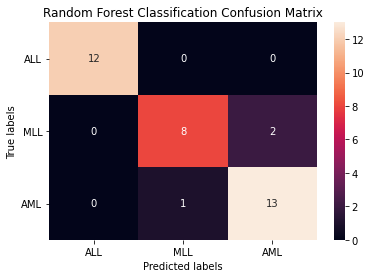

In [68]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_1, y_test_pred_14), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Classification Confusion Matrix') 
ax.xaxis.set_ticklabels(label) 
ax.yaxis.set_ticklabels(label, rotation=360)

# CASE 2: Using 70% of the dataset as training set and 30% of the dataset as test set.

# 2.0.Train-Test Split (70:30)

In [69]:
train_set_2, test_set_2 = train_test_split(data_new, test_size = 0.3, random_state = 42)

In [70]:
print(f"Rows in train set: {len(train_set_2)}\nRows in test set: {len(test_set_2)}")

Rows in train set: 50
Rows in test set: 22


In [71]:
print(train_set_2.shape)
print(test_set_2.shape)

(50, 21)
(22, 21)


In [72]:
train_set_2.head()

Type  1389_at  34306_at  36162_at  963_at  39598_at  40797_at  39448_r_at  \
35     1    344.0    9429.0    3990.0     264    1313.0    2785.0        2181   
44     2   2285.0    2647.0    9817.0     184    6250.0     389.0        1613   
69     2   1571.0     640.0    5157.0     112    2851.0     212.0        2117   
7      0  18321.0    3822.0    8838.0    1547    -374.0    1810.0         312   
55     2   2399.0    5293.0    6778.0      49    6309.0     928.0        1727   

    1894_f_at  39931_at  ...  36239_at  39556_at  34168_at  40570_at  \
35     1627.0       646  ...    1141.0    1933.0     325.0    3483.0   
44     5504.0       279  ...      13.0     737.0      37.0     836.0   
69     2657.0        35  ...     -30.0     285.0     138.0     689.0   
7      1860.0      2495  ...    5714.0    4337.0    7048.0   11271.0   
55     1492.0       179  ...      44.0     570.0     -47.0     929.0   

    39385_at  266_s_at  39011_at  1065_at  39318_at  32872_at  
35     -41.0    9389.0    2233.0  10273.0   18634.0     837.0  
44    1768.0      23.0    5083.0   3089.0     530.0     165.0  
69    2103.0       7.0    3255.0   1196.0     492.0     182.0  
7      668.0   15170.0     946.0   1845.0   21399.0    2870.0  
55    4265.0    6669.0    7332.0    482.0     574.0      53.0  

[5 rows x 21 columns]

In [73]:
test_set_2.head()

Type  1389_at  34306_at  36162_at  963_at  39598_at  40797_at  39448_r_at  \
4      0  20824.0    4826.0    4727.0    1660    1958.0    1244.0        1102   
62     2    496.0    4338.0    7578.0     257    5155.0     628.0        2693   
18     0  14306.0    5099.0    3331.0     473    1698.0    2083.0         839   
0      0  15467.9    2338.3     951.2    1790    1118.1    1100.4        1093   
28     1    773.0   11210.0    1572.0     169     731.0    1619.0        1003   

    1894_f_at  39931_at  ...  36239_at  39556_at  34168_at  40570_at  \
4      1737.0      1435  ...    2363.0    2194.0    9363.0    6703.0   
62     4557.0       191  ...      45.0     510.0    -152.0     509.0   
18      876.0      1715  ...    2125.0    1338.0    6284.0    7873.0   
0      1055.7      1581  ...   10358.4    4027.3   11917.7    4950.5   
28      -27.0       537  ...     520.0     599.0     108.0    3186.0   

    39385_at  266_s_at  39011_at  1065_at  39318_at  32872_at  
4      347.0    5817.0    2211.0  10336.0   22301.0    1634.0  
62    1218.0     178.0    5693.0   5897.0     501.0     335.0  
18     232.0   11211.0    1404.0   9294.0   22281.0    6677.0  
0       84.8   14650.4    1350.9   1508.5   15880.4    1682.7  
28      69.0    2528.0    1276.0  10863.0     655.0    -214.0  

[5 rows x 21 columns]

In [74]:
X_train_2 = train_set_2.drop("Type", axis = 1)
y_train_2 = train_set_2["Type"]
X_test_2 = test_set_2.drop("Type", axis = 1)
y_test_2 = test_set_2["Type"]

# 2.1.Confusion Matrix Heatmap of perfect predictions

[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'MLL'), Text(0, 2.5, 'AML')]

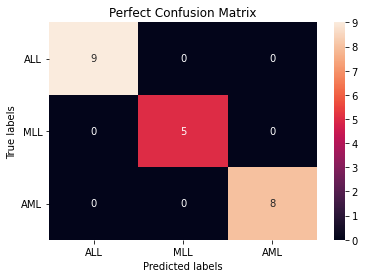

In [75]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_2, y_test_2), ax = ax, annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Perfect Confusion Matrix') 
ax.xaxis.set_ticklabels(label) 
ax.yaxis.set_ticklabels(label, rotation=360)

# 2.2.Using Logistic Regression model

In [76]:
model_2 = LogisticRegression()
model_2.fit(X_train_2, y_train_2)

LogisticRegression()

In [77]:
lr_score_2 = model_2.score(X_train_2, y_train_2)

In [78]:
print(f"Score: {round((lr_score_2*100), 2)}%")

Score: 100.0%


In [79]:
y_test_pred_2 = model_2.predict(X_test_2)

y_test_pred_2

array([0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 1, 1, 2, 0],
      dtype=int64)

## 2.2.1.Accuracy, Precision_score, Recall_score, F1_score of the Logistic Regressor

In [80]:
print(f"Accuracy: {round((accuracy_score(y_test_2, y_test_pred_2)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_2, y_test_pred_2, labels=[0,1,2], average='micro')*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_2, y_test_pred_2, labels=[0,1,2], average='micro')*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_2, y_test_pred_2, labels=[0,1,2], average='micro')*100), 2)}%")

Accuracy: 95.45%
Precision: 95.45%
Recall: 95.45%
F1_score: 95.45%


## 2.2.2.Classification Report of the Logistic Regressor

In [81]:
print(classification_report(y_test_2, y_test_pred_2))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         8

    accuracy                           0.95        22
   macro avg       0.94      0.96      0.95        22
weighted avg       0.96      0.95      0.96        22



## 2.2.3.Confusion Matrix Heatmap of the Logistic Regressor

In [82]:
confusion_matrix(y_test_2, y_test_pred_2)

array([[8, 1, 0],
       [0, 5, 0],
       [0, 0, 8]], dtype=int64)

[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'MLL'), Text(0, 2.5, 'AML')]

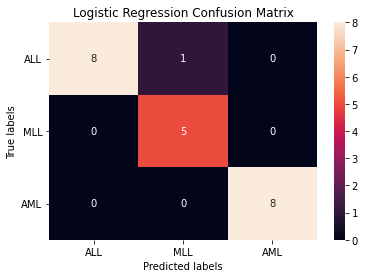

In [83]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_2, y_test_pred_2), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression Confusion Matrix') 
ax.xaxis.set_ticklabels(label) 
ax.yaxis.set_ticklabels(label, rotation=360)

# 2.3.Using SVM model

In [84]:
svm_clf_2 = SVC()
svm_clf_2.fit(X_train_2, y_train_2)

SVC()

In [85]:
svm_score_2 = svm_clf_2.score(X_train_2, y_train_2)

In [86]:
print(f"Score: {round((svm_score_2*100), 2)}%")

Score: 98.0%


In [87]:
y_test_pred_21 = svm_clf_2.predict(X_test_2)

y_test_pred_21

array([0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 1, 1, 2, 0],
      dtype=int64)

## 2.3.1.Accuracy, Precision_score, Recall_score, F1_score of the SVM model

In [88]:
print(f"Accuracy: {round((accuracy_score(y_test_2, y_test_pred_21)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_2, y_test_pred_21, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_2, y_test_pred_21, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_2, y_test_pred_21, labels=[0,1,2], average='weighted')*100), 2)}%")

Accuracy: 95.45%
Precision: 96.21%
Recall: 95.45%
F1_score: 95.53%


## 2.3.2.Classification Report of the SVM model

In [89]:
print(classification_report(y_test_2, y_test_pred_21))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00         8

    accuracy                           0.95        22
   macro avg       0.94      0.96      0.95        22
weighted avg       0.96      0.95      0.96        22



## 2.3.3.Confusion Matrix Heatmap of the SVM model

In [90]:
confusion_matrix(y_test_2, y_test_pred_21)

array([[8, 1, 0],
       [0, 5, 0],
       [0, 0, 8]], dtype=int64)

[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'MLL'), Text(0, 2.5, 'AML')]

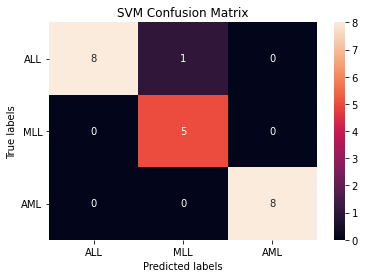

In [91]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_2, y_test_pred_21), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVM Confusion Matrix') 
ax.xaxis.set_ticklabels(label) 
ax.yaxis.set_ticklabels(label, rotation=360)

# 2.4.Using Naive Bayes model

In [92]:
gnb_2 = GaussianNB()
gnb_2.fit(X_train_2, y_train_2)

GaussianNB()

In [93]:
gnb_score_2 = gnb_2.score(X_train_2, y_train_2)

In [94]:
print(f"Score: {round((gnb_score_2*100), 2)}%")

Score: 100.0%


In [95]:
y_test_pred_22 = gnb_2.predict(X_test_2)

y_test_pred_22

array([0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0],
      dtype=int64)

## 2.4.1.Accuracy, Precision_score, Recall_score, F1_score of the Naive Bayes model

In [96]:
print(f"Accuracy: {round((accuracy_score(y_test_2, y_test_pred_22)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_2, y_test_pred_22, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_2, y_test_pred_22, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_2, y_test_pred_22, labels=[0,1,2], average='weighted')*100), 2)}%")

Accuracy: 95.45%
Precision: 96.21%
Recall: 95.45%
F1_score: 95.51%


## 2.4.2.Classification Report of the Naive Bayes model

In [97]:
print(classification_report(y_test_2, y_test_pred_22))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91         5
           2       1.00      0.88      0.93         8

    accuracy                           0.95        22
   macro avg       0.94      0.96      0.95        22
weighted avg       0.96      0.95      0.96        22



## 2.4.3.Confusion Matrix Heatmap of the Naive Bayes model

In [98]:
confusion_matrix(y_test_2, y_test_pred_22)

array([[9, 0, 0],
       [0, 5, 0],
       [0, 1, 7]], dtype=int64)

[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'MLL'), Text(0, 2.5, 'AML')]

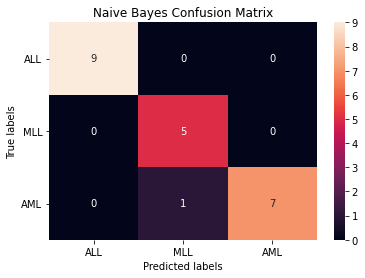

In [99]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_2, y_test_pred_22), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Naive Bayes Confusion Matrix') 
ax.xaxis.set_ticklabels(label) 
ax.yaxis.set_ticklabels(label, rotation=360)

# 2.5.Using XGBoost model

In [100]:
xgb_clf_2 = XGBClassifier(use_label_encoder = False, gamma=1, eval_metric='mlogloss', max_depth = 3, learning_rate=0.1)
xgb_clf_2.fit(X_train_2, y_train_2)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [101]:
xgb_score_2 = xgb_clf_2.score(X_train_2, y_train_2)

In [102]:
print(f"Score: {round((xgb_score_2*100), 2)}%")

Score: 100.0%


In [103]:
y_test_pred_23 = xgb_clf_2.predict(X_test_2)

y_test_pred_23

array([0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0],
      dtype=int64)

## 2.5.1.Accuracy, Precision_score, Recall_score, F1_score of the XGBoost model

In [104]:
print(f"Accuracy: {round((accuracy_score(y_test_2, y_test_pred_23)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_2, y_test_pred_23, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_2, y_test_pred_23, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_2, y_test_pred_23, labels=[0,1,2], average='weighted')*100), 2)}%")

Accuracy: 95.45%
Precision: 95.96%
Recall: 95.45%
F1_score: 95.34%


## 2.5.2.Classification Report of the XGBoost model

In [105]:
print(classification_report(y_test_2, y_test_pred_23))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.80      0.89         5
           2       0.89      1.00      0.94         8

    accuracy                           0.95        22
   macro avg       0.96      0.93      0.94        22
weighted avg       0.96      0.95      0.95        22



## 2.5.3.Confusion Matrix Heatmap of the XGBoost model

In [106]:
confusion_matrix(y_test_2, y_test_pred_23)

array([[9, 0, 0],
       [0, 4, 1],
       [0, 0, 8]], dtype=int64)

[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'MLL'), Text(0, 2.5, 'AML')]

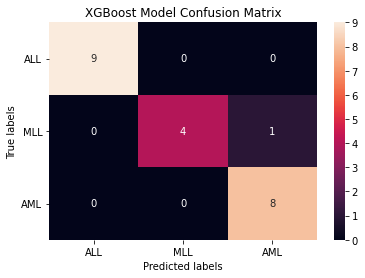

In [107]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_2, y_test_pred_23), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('XGBoost Model Confusion Matrix') 
ax.xaxis.set_ticklabels(label) 
ax.yaxis.set_ticklabels(label, rotation=360)

# 2.6.Using Random Forest Classifier

In [108]:
rfc_clf_2 = RandomForestClassifier(max_depth = 3, random_state = 0)
rfc_clf_2.fit(X_train_2, y_train_2)

RandomForestClassifier(max_depth=3, random_state=0)

In [109]:
rfc_score_2 = rfc_clf_2.score(X_train_2, y_train_2)

In [110]:
print(f"Score: {round((rfc_score_2*100), 2)}%")

Score: 100.0%


In [111]:
y_test_pred_24 = rfc_clf_2.predict(X_test_2)

y_test_pred_24

array([0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0],
      dtype=int64)

## 2.6.1.Accuracy, Precision_score, Recall_score, F1_score of this Random Forest Classifier

In [112]:
print(f"Accuracy: {round((accuracy_score(y_test_2, y_test_pred_24)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_2, y_test_pred_24, labels=[0,1,2,3], average='weighted')*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_2, y_test_pred_24, labels=[0,1,2,3], average='weighted')*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_2, y_test_pred_24, labels=[0,1,2,3], average='weighted')*100), 2)}%")

Accuracy: 95.45%
Precision: 96.21%
Recall: 95.45%
F1_score: 95.51%


## 2.6.2.Classification Report of this Random Forest Classifier

In [113]:
print(classification_report(y_test_2, y_test_pred_24))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.91         5
           2       1.00      0.88      0.93         8

    accuracy                           0.95        22
   macro avg       0.94      0.96      0.95        22
weighted avg       0.96      0.95      0.96        22



## 2.6.3.Confusion Matrix Heatmap of this Random Forest Classifier

In [114]:
confusion_matrix(y_test_2, y_test_pred_24)

array([[9, 0, 0],
       [0, 5, 0],
       [0, 1, 7]], dtype=int64)

[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'MLL'), Text(0, 2.5, 'AML')]

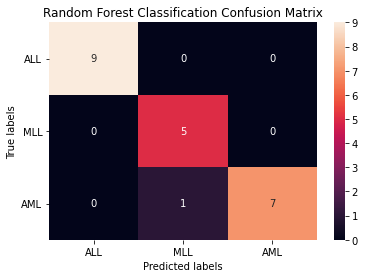

In [115]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_2, y_test_pred_24), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Classification Confusion Matrix') 
ax.xaxis.set_ticklabels(label) 
ax.yaxis.set_ticklabels(label, rotation=360)

# CASE 3: Using 80% of the dataset as training set and 20% of the dataset as test set.

# 3.0.Train-Test Split (80:20)

In [116]:
train_set_3, test_set_3 = train_test_split(data_new, test_size = 0.2, random_state = 42)

In [117]:
print(f"Rows in train set: {len(train_set_3)}\nRows in test set: {len(test_set_3)}")

Rows in train set: 57
Rows in test set: 15


In [118]:
train_set_3.head()

Type  1389_at  34306_at  36162_at  963_at  39598_at  40797_at  39448_r_at  \
22     0  19748.0    4868.0    2514.0    1526    1303.0    1860.0        1041   
56     2   1227.0    1760.0   11046.0      69    5207.0     242.0        1878   
49     2    556.0    1846.0    5062.0    -144    3966.0     475.0        2677   
33     1    938.0   14648.0    2228.0     913    1905.0    6622.0        1612   
39     1     13.0   10321.0    2774.0     249    3694.0    5259.0        2299   

    1894_f_at  39931_at  ...  36239_at  39556_at  34168_at  40570_at  \
22     2119.0      1344  ...    7600.0    2737.0   10364.0    7234.0   
56     4187.0       219  ...      -2.0    1099.0     -18.0    1659.0   
49     2696.0        39  ...    -140.0    1111.0     -41.0    1706.0   
33     1241.0       233  ...     223.0    2504.0     -24.0    3843.0   
39      755.0       222  ...     631.0     971.0    1943.0    1316.0   

    39385_at  266_s_at  39011_at  1065_at  39318_at  32872_at  
22      -8.0   14970.0    1334.0   1185.0   28168.0    3107.0  
56    2513.0     -73.0    5350.0   4010.0     656.0    -229.0  
49    1492.0     -72.0    8927.0   4300.0     478.0     -44.0  
33     656.0    2359.0    1779.0  20111.0    6890.0     688.0  
39     -52.0     544.0    1469.0  16690.0    1228.0     400.0  

[5 rows x 21 columns]

In [119]:
test_set_3.head()

Type  1389_at  34306_at  36162_at  963_at  39598_at  40797_at  39448_r_at  \
4      0  20824.0    4826.0    4727.0    1660    1958.0    1244.0        1102   
62     2    496.0    4338.0    7578.0     257    5155.0     628.0        2693   
18     0  14306.0    5099.0    3331.0     473    1698.0    2083.0         839   
0      0  15467.9    2338.3     951.2    1790    1118.1    1100.4        1093   
28     1    773.0   11210.0    1572.0     169     731.0    1619.0        1003   

    1894_f_at  39931_at  ...  36239_at  39556_at  34168_at  40570_at  \
4      1737.0      1435  ...    2363.0    2194.0    9363.0    6703.0   
62     4557.0       191  ...      45.0     510.0    -152.0     509.0   
18      876.0      1715  ...    2125.0    1338.0    6284.0    7873.0   
0      1055.7      1581  ...   10358.4    4027.3   11917.7    4950.5   
28      -27.0       537  ...     520.0     599.0     108.0    3186.0   

    39385_at  266_s_at  39011_at  1065_at  39318_at  32872_at  
4      347.0    5817.0    2211.0  10336.0   22301.0    1634.0  
62    1218.0     178.0    5693.0   5897.0     501.0     335.0  
18     232.0   11211.0    1404.0   9294.0   22281.0    6677.0  
0       84.8   14650.4    1350.9   1508.5   15880.4    1682.7  
28      69.0    2528.0    1276.0  10863.0     655.0    -214.0  

[5 rows x 21 columns]

In [120]:
X_train_3 = train_set_3.drop("Type", axis = 1)
y_train_3 = train_set_3["Type"]
X_test_3 = test_set_3.drop("Type", axis = 1)
y_test_3 = test_set_3["Type"]

# 3.1.Confusion Matrix Heatmap of perfect predictions

[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'MLL'), Text(0, 2.5, 'AML')]

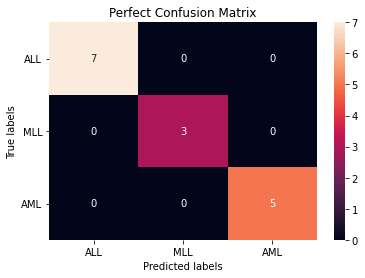

In [121]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_3, y_test_3), ax = ax, annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Perfect Confusion Matrix') 
ax.xaxis.set_ticklabels(label) 
ax.yaxis.set_ticklabels(label, rotation=360)

# 3.2.Using Logistic Regression model

In [122]:
model_3 = LogisticRegression()
model_3.fit(X_train_3, y_train_3)

LogisticRegression()

In [123]:
lr_score_3 = model_3.score(X_train_3, y_train_3)

In [124]:
print(f"Score: {round((lr_score_3*100), 2)}%")

Score: 100.0%


In [125]:
y_test_pred_3 = model_3.predict(X_test_3)

y_test_pred_3

array([0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0], dtype=int64)

## 3.2.1.Accuracy, Precision_score, Recall_score, F1_score of the Logistic Regressor

In [126]:
print(f"Accuracy: {round((accuracy_score(y_test_3, y_test_pred_3)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_3, y_test_pred_3, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_3, y_test_pred_3, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_3, y_test_pred_3, labels=[0,1,2], average='weighted')*100), 2)}%")

Accuracy: 93.33%
Precision: 95.0%
Recall: 93.33%
F1_score: 93.55%


## 3.2.2.Classification Report of the Logistic Regressor

In [127]:
print(classification_report(y_test_3, y_test_pred_3))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         5

    accuracy                           0.93        15
   macro avg       0.92      0.95      0.93        15
weighted avg       0.95      0.93      0.94        15



## 3.2.3.Confusion Matrix Heatmap of the Logistic Regressor

In [128]:
confusion_matrix(y_test_3, y_test_pred_3)

array([[6, 1, 0],
       [0, 3, 0],
       [0, 0, 5]], dtype=int64)

[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'MLL'), Text(0, 2.5, 'AML')]

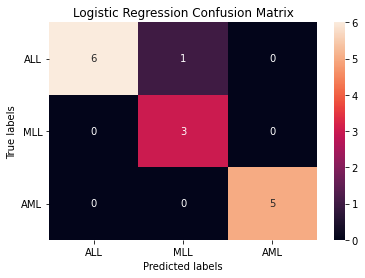

In [129]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_3, y_test_pred_3), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Logistic Regression Confusion Matrix') 
ax.xaxis.set_ticklabels(label) 
ax.yaxis.set_ticklabels(label, rotation=360)

# 3.3.Using SVM model

In [130]:
svm_clf_3 = SVC()
svm_clf_3.fit(X_train_3, y_train_3)

SVC()

In [131]:
svm_score_3 = svm_clf_3.score(X_train_3, y_train_3)

In [132]:
print(f"Score: {round((svm_score_3*100), 2)}%")

Score: 98.25%


In [133]:
y_test_pred_31 = svm_clf_3.predict(X_test_3)

y_test_pred_31

array([0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0], dtype=int64)

## 3.3.1.Accuracy, Precision_score, Recall_score, F1_score of the SVM model

In [134]:
print(f"Accuracy: {round((accuracy_score(y_test_3, y_test_pred_31)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_3, y_test_pred_31, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_3, y_test_pred_31, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_3, y_test_pred_31, labels=[0,1,2], average='weighted')*100), 2)}%")

Accuracy: 93.33%
Precision: 95.0%
Recall: 93.33%
F1_score: 93.55%


## 3.3.2.Classification Report of the SVM model

In [135]:
print(classification_report(y_test_3, y_test_pred_31))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.75      1.00      0.86         3
           2       1.00      1.00      1.00         5

    accuracy                           0.93        15
   macro avg       0.92      0.95      0.93        15
weighted avg       0.95      0.93      0.94        15



## 3.3.3.Confusion Matrix Heatmap of the SVM model

In [136]:
confusion_matrix(y_test_3, y_test_pred_31)

array([[6, 1, 0],
       [0, 3, 0],
       [0, 0, 5]], dtype=int64)

[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'MLL'), Text(0, 2.5, 'AML')]

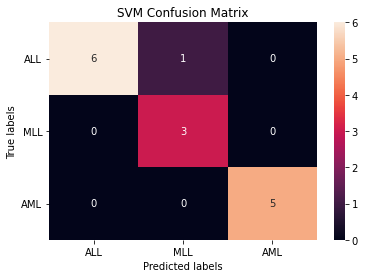

In [137]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_3, y_test_pred_31), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('SVM Confusion Matrix') 
ax.xaxis.set_ticklabels(label) 
ax.yaxis.set_ticklabels(label, rotation=360)

# 3.4.Using Naive Bayes model

In [138]:
gnb_3 = GaussianNB()
gnb_3.fit(X_train_3, y_train_3)

GaussianNB()

In [139]:
gnb_score_3 = gnb_3.score(X_train_3, y_train_3)

In [140]:
print(f"Score: {round((gnb_score_3*100), 2)}%")

Score: 100.0%


In [141]:
y_test_pred_32 = gnb_3.predict(X_test_3)

## 3.4.1.Accuracy, Precision_score, Recall_score, F1_score of the Naive Bayes model

In [142]:
print(f"Accuracy: {round((accuracy_score(y_test_3, y_test_pred_32)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_3, y_test_pred_32, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_3, y_test_pred_32, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_3, y_test_pred_32, labels=[0,1,2], average='weighted')*100), 2)}%")

Accuracy: 93.33%
Precision: 95.0%
Recall: 93.33%
F1_score: 93.44%


## 3.4.2.Classification Report of the Naive Bayes model

In [143]:
print(classification_report(y_test_3, y_test_pred_32))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.75      1.00      0.86         3
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.92      0.93      0.92        15
weighted avg       0.95      0.93      0.93        15



## 3.4.3.Confusion Matrix Heatmap of the Naive Bayes model

In [144]:
confusion_matrix(y_test_3, y_test_pred_32)

array([[7, 0, 0],
       [0, 3, 0],
       [0, 1, 4]], dtype=int64)

[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'MLL'), Text(0, 2.5, 'AML')]

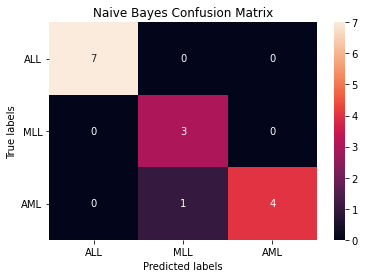

In [145]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_3, y_test_pred_32), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Naive Bayes Confusion Matrix') 
ax.xaxis.set_ticklabels(label) 
ax.yaxis.set_ticklabels(label, rotation=360)

# 3.5.Using XGBoost model

In [146]:
xgb_clf_3 = XGBClassifier(use_label_encoder = False, gamma=1, eval_metric='mlogloss', max_depth = 3, learning_rate=0.1)
xgb_clf_3.fit(X_train_3, y_train_3)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [147]:
xgb_score_3 = xgb_clf_3.score(X_train_3, y_train_3)

In [148]:
print(f"Score: {round((xgb_score_3*100), 2)}%")

Score: 100.0%


In [149]:
y_test_pred_33 = xgb_clf_3.predict(X_test_3)

y_test_pred_33

array([0, 2, 0, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 2, 0], dtype=int64)

## 3.5.1.Accuracy, Precision_score, Recall_score, F1_score of the XGBoost model

In [150]:
print(f"Accuracy: {round((accuracy_score(y_test_3, y_test_pred_33)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_3, y_test_pred_33, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_3, y_test_pred_33, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_3, y_test_pred_33, labels=[0,1,2], average='weighted')*100), 2)}%")

Accuracy: 100.0%
Precision: 100.0%
Recall: 100.0%
F1_score: 100.0%


## 3.5.2.Classification Report of the XGBoost model

In [151]:
print(classification_report(y_test_3, y_test_pred_33))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



## 3.5.3.Confusion Matrix Heatmap of the XGBoost model

In [152]:
confusion_matrix(y_test_3, y_test_pred_33)

array([[7, 0, 0],
       [0, 3, 0],
       [0, 0, 5]], dtype=int64)

[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'MLL'), Text(0, 2.5, 'AML')]

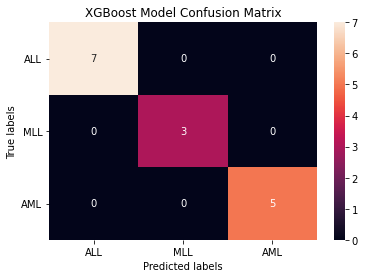

In [153]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_3, y_test_pred_33), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('XGBoost Model Confusion Matrix') 
ax.xaxis.set_ticklabels(label) 
ax.yaxis.set_ticklabels(label, rotation=360)

# 3.6.Using Random Forest Classifier

In [154]:
rfc_clf_3 = RandomForestClassifier(max_depth = 3, random_state = 0)
rfc_clf_3.fit(X_train_3, y_train_3)

RandomForestClassifier(max_depth=3, random_state=0)

In [155]:
rfc_score_3 = rfc_clf_3.score(X_train_1, y_train_1)

In [156]:
print(f"Score: {round((rfc_score_3*100), 2)}%")

Score: 100.0%


In [157]:
y_test_pred_34 = rfc_clf_3.predict(X_test_3)

y_test_pred_34

array([0, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0], dtype=int64)

## 3.6.1.Accuracy, Precision_score, Recall_score, F1_score of this Random Forest Classifier

In [158]:
print(f"Accuracy: {round((accuracy_score(y_test_3, y_test_pred_34)*100), 2)}%") 
print(f"Precision: {round((precision_score(y_test_3, y_test_pred_34, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"Recall: {round((recall_score(y_test_3, y_test_pred_34, labels=[0,1,2], average='weighted')*100), 2)}%")
print(f"F1_score: {round((f1_score(y_test_3, y_test_pred_34, labels=[0,1,2], average='weighted')*100), 2)}%")

Accuracy: 93.33%
Precision: 95.0%
Recall: 93.33%
F1_score: 93.44%


## 3.6.2.Classification Report of this Random Forest Classifier

In [159]:
print(classification_report(y_test_3, y_test_pred_34))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.75      1.00      0.86         3
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.92      0.93      0.92        15
weighted avg       0.95      0.93      0.93        15



## 3.6.3.Confusion Matrix Heatmap of this Random Forest Classifier

In [160]:
confusion_matrix(y_test_3, y_test_pred_34)

array([[7, 0, 0],
       [0, 3, 0],
       [0, 1, 4]], dtype=int64)

[Text(0, 0.5, 'ALL'), Text(0, 1.5, 'MLL'), Text(0, 2.5, 'AML')]

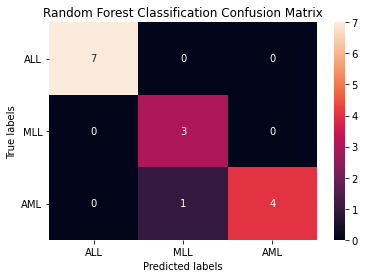

In [161]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test_3, y_test_pred_34), annot = True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Random Forest Classification Confusion Matrix') 
ax.xaxis.set_ticklabels(label) 
ax.yaxis.set_ticklabels(label, rotation=360)